In [307]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
cars = pd.read_csv('car_evaluation.csv')

## About the Dataset
from: https://archive.ics.uci.edu/ml/datasets/car+evaluation

## Preparing the Data

In [308]:
cars.columns = ['buying_price', 'maintenance_cost', 'doors', 'passengers', 'luggage_boot', 'safety', 'decision']
cars.head(1)

,buying_price,maintenance_cost,doors,passengers,luggage_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc


In [309]:
from sklearn.preprocessing import LabelEncoder

In [310]:
le_buying_price = LabelEncoder()
le_maintenance_cost = LabelEncoder()
le_doors = LabelEncoder()
le_passengers = LabelEncoder()
le_luggage_boot = LabelEncoder()
le_safety = LabelEncoder()

In [311]:
cars['buying_price_n'] = le_buying_price.fit_transform(cars['buying_price'])
cars['maintenance_cost_n'] = le_maintenance_cost.fit_transform(cars['maintenance_cost'])
cars['doors_n'] = le_doors.fit_transform(cars['doors'])
cars['passengers_n'] = le_passengers.fit_transform(cars['passengers'])
cars['luggage_boot_n'] = le_luggage_boot.fit_transform(cars['luggage_boot'])
cars['safety_n'] = le_safety.fit_transform(cars['safety'])

cars.head(1)

,buying_price,maintenance_cost,doors,passengers,luggage_boot,safety,decision,buying_price_n,maintenance_cost_n,doors_n,passengers_n,luggage_boot_n,safety_n
0,vhigh,vhigh,2,2,small,med,unacc,3,3,0,0,2,2


In [312]:
cars_n = cars.drop(['buying_price', 'maintenance_cost', 'doors', 'passengers', 'luggage_boot', 
                    'safety', 'decision'], axis='columns')
cars_n.head(1)

,buying_price_n,maintenance_cost_n,doors_n,passengers_n,luggage_boot_n,safety_n
0,3,3,0,0,2,2


In [313]:
inputs = pd.DataFrame()
target = pd.DataFrame()

In [315]:
inputs = cars_n
inputs.head(1)

,buying_price_n,maintenance_cost_n,doors_n,passengers_n,luggage_boot_n,safety_n
0,3,3,0,0,2,2


In [316]:
target_n = cars['decision']
target_n.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: decision, dtype: object

In [317]:
target = target_n.to_frame()
target.head()

,decision
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


# Decision Tree

In [292]:
from datetime import datetime
start_time = datetime.now()

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

model = tree.DecisionTreeClassifier()
model.fit(inputs, target)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.004306


In [293]:
model.predict([[3, 3, 0, 0, 2 , 2]])

array(['unacc'], dtype=object)

In [294]:
cars.decision.value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64

In [295]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, max_depth=None, feature_names=inputs.columns,
                                class_names=['Acceptable', 'Good', 'Unacceptable', 'Very Good'],  filled=True, 
                                rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)  
graph.render('dtree_render',view=True)


'dtree_render.pdf'

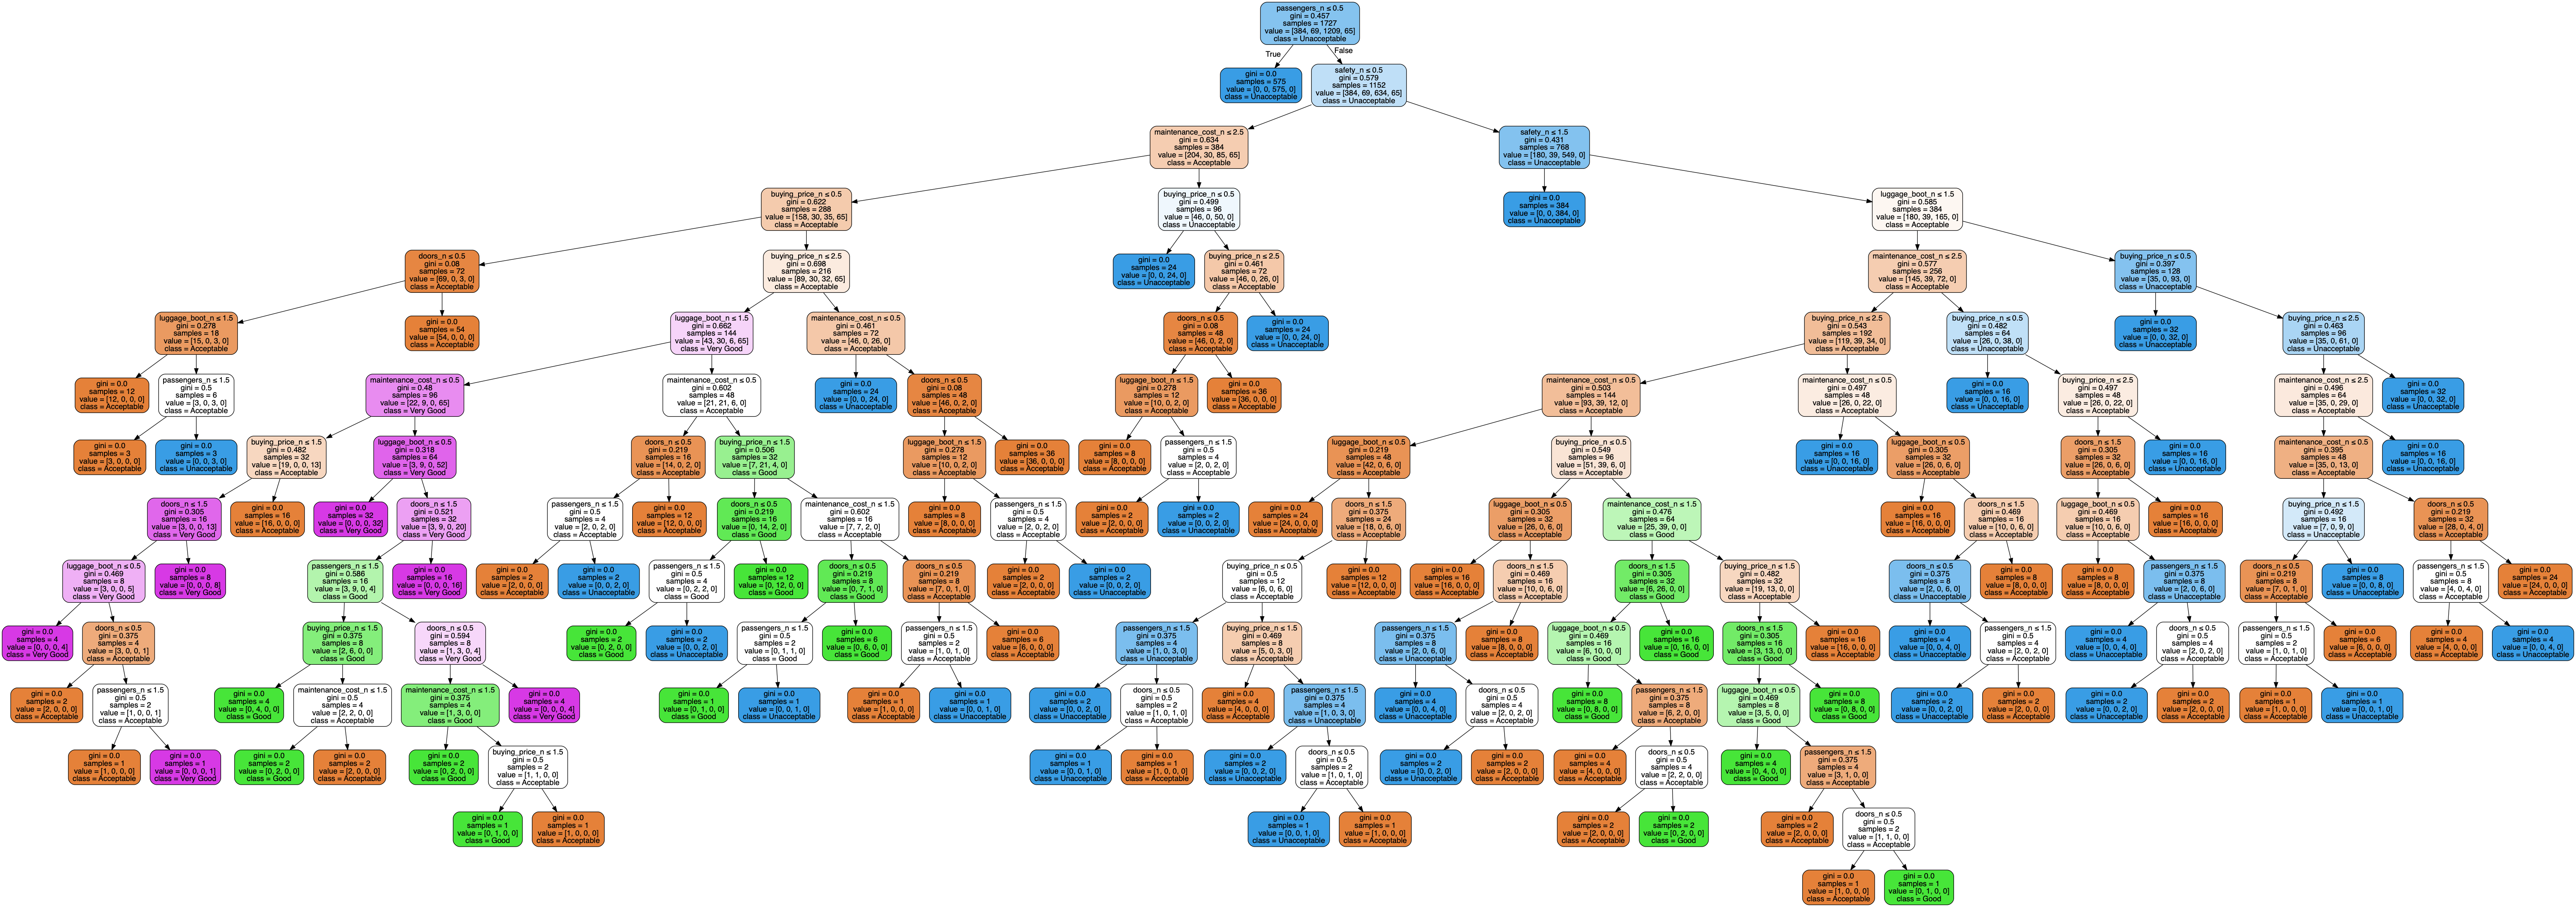

In [296]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [297]:
y_predict = model.predict(inputs)
y_predict

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'good', 'vgood'],
      dtype=object)

In [298]:
from sklearn.metrics import accuracy_score
score = accuracy_score(target, y_predict)*100

### Decision Tree Accuracy

In [299]:
print("Accuracy Score using Decision Tree: ", round(score, 1), "%")

Accuracy Score using Decision Tree:  100.0 %


# Random Forest

In [300]:
x = inputs
y = target

In [302]:
from datetime import datetime
start_time = datetime.now()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=60)
model.fit(X_train, y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.077707


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


### Random Forest Accuracy

In [303]:
model.score(X_test, y_test)

0.9797687861271677

# Conclusions

In my experiment, The Decission Tree model was both faster and more accurate than the Random Forest Model. I am not sure that these were the results that I was supposedd to get based on the wording of the challenge. I will discuss with my mentor in my next meeting.